In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [3]:
import os
from PIL import Image
import numpy as np

In [4]:
def load_images_from_folder(base_path, target_size=(224, 224)):
    images = []
    labels = []
    for label_name in os.listdir(base_path):
       
        print(label_name)
        
        label_path = os.path.join(base_path, label_name)
        if not os.path.isdir(label_path):
            continue
        
        ctr =0;
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            ctr = ctr+1
            print(ctr)
            try:
                image = Image.open(image_path)
                
                image = image.convert('L')
                image = image.resize(target_size)
                image = np.stack((image,)*3, axis=-1)
                image = np.array(image)
                
                labels.append(label_name)
                images.append(image)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    images = np.array(images, dtype = object)
    labels = np.array(labels, dtype = object)

    return images,labels


In [5]:
base_path = "D:\Om Saran\IIT BBS\Intern\cervical\dataset_smaller"

In [6]:
images,labels = load_images_from_folder(base_path, target_size=(224, 224))

benign
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
malignant
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
suspicious
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119


In [8]:
(images[0][0][0])

array([220, 220, 220], dtype=object)

In [9]:
prev = images[0].astype(int)
prev

array([[[220, 220, 220],
        [219, 219, 219],
        [217, 217, 217],
        ...,
        [226, 226, 226],
        [227, 227, 227],
        [231, 231, 231]],

       [[218, 218, 218],
        [220, 220, 220],
        [208, 208, 208],
        ...,
        [230, 230, 230],
        [225, 225, 225],
        [227, 227, 227]],

       [[213, 213, 213],
        [219, 219, 219],
        [207, 207, 207],
        ...,
        [234, 234, 234],
        [233, 233, 233],
        [233, 233, 233]],

       ...,

       [[194, 194, 194],
        [151, 151, 151],
        [148, 148, 148],
        ...,
        [251, 251, 251],
        [190, 190, 190],
        [172, 172, 172]],

       [[207, 207, 207],
        [184, 184, 184],
        [186, 186, 186],
        ...,
        [144, 144, 144],
        [131, 131, 131],
        [173, 173, 173]],

       [[213, 213, 213],
        [215, 215, 215],
        [217, 217, 217],
        ...,
        [211, 211, 211],
        [210, 210, 210],
        [211, 211, 211]]

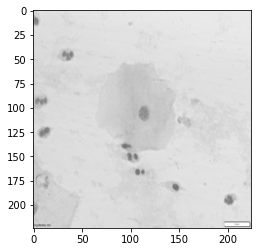

In [10]:
plt.imshow(prev, cmap = 'gray')

In [11]:
normalized_images = images.astype(np.float32) / 255.0

In [12]:
normalized_images[0]

array([[[0.8627451 , 0.8627451 , 0.8627451 ],
        [0.85882354, 0.85882354, 0.85882354],
        [0.8509804 , 0.8509804 , 0.8509804 ],
        ...,
        [0.8862745 , 0.8862745 , 0.8862745 ],
        [0.8901961 , 0.8901961 , 0.8901961 ],
        [0.90588236, 0.90588236, 0.90588236]],

       [[0.85490197, 0.85490197, 0.85490197],
        [0.8627451 , 0.8627451 , 0.8627451 ],
        [0.8156863 , 0.8156863 , 0.8156863 ],
        ...,
        [0.9019608 , 0.9019608 , 0.9019608 ],
        [0.88235295, 0.88235295, 0.88235295],
        [0.8901961 , 0.8901961 , 0.8901961 ]],

       [[0.8352941 , 0.8352941 , 0.8352941 ],
        [0.85882354, 0.85882354, 0.85882354],
        [0.8117647 , 0.8117647 , 0.8117647 ],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [0.9137255 , 0.9137255 , 0.9137255 ],
        [0.9137255 , 0.9137255 , 0.9137255 ]],

       ...,

       [[0.7607843 , 0.7607843 , 0.7607843 ],
        [0.5921569 , 0.5921569 , 0.5921569 ],
        [0.5803922 , 0

In [13]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

label_encoder = LabelEncoder()
# Fit and transform labels to numeric format
encoded_labels = label_encoder.fit_transform(labels)

# Convert numeric labels to one-hot encoded vectors
n_labels = tf.keras.utils.to_categorical(encoded_labels)

n_labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(normalized_images,n_labels, test_size = 0.3, random_state = 42)

In [16]:
type(x_train)

numpy.ndarray

In [17]:
len(x_train)

224

In [18]:
x_train.shape

(224, 224, 224, 3)

In [19]:
type(x_train)

numpy.ndarray

In [43]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [44]:
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='sigmoid')(x)
x = Dense(512, activation = 'relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Adjust num_classes based on your task

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [45]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate = 0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [46]:
model.fit(x_train, y_train, epochs=5, batch_size=8, validation_split=0.25)

Epoch 1/5
21/21 [==============================] - 44s 2s/step - loss: 1.2323 - accuracy: 0.5060 - val_loss: 0.7191 - val_accuracy: 0.7143
Epoch 2/5
21/21 [==============================] - 46s 2s/step - loss: 0.4780 - accuracy: 0.8690 - val_loss: 0.3510 - val_accuracy: 0.8571
Epoch 3/5
21/21 [==============================] - 46s 2s/step - loss: 0.3181 - accuracy: 0.8571 - val_loss: 0.0919 - val_accuracy: 0.9821
Epoch 4/5
21/21 [==============================] - 45s 2s/step - loss: 0.1234 - accuracy: 0.9762 - val_loss: 0.0750 - val_accuracy: 0.9821
Epoch 5/5
21/21 [==============================] - 46s 2s/step - loss: 0.0551 - accuracy: 0.9881 - val_loss: 0.1481 - val_accuracy: 0.9464


In [47]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

3/3 - 19s - loss: 0.3242 - accuracy: 0.9062
Test Accuracy: 90.62%


In [48]:
def load_and_preprocess_image(image_path):
    # Load the image
    image = Image.open(image_path)
    image = image.convert('L')
    # Resize the image to the input size required by your model (e.g., 224x224)
    image_resized = image.resize((224, 224))
    image_3 = np.stack((image_resized,)*3, axis=-1)
    # Convert the image to a numpy array
    image_array = np.array(image_3)
    # Normalize the image (e.g., scale pixel values to [0, 1] range)
    image_normalized = image_array / 255.0
    # Expand dimensions to match the input shape of the model (batch_size, height, width, channels)
    image_expanded = np.expand_dims(image_normalized, axis=0)
    return image_expanded


In [55]:
image_path = "D:\Om Saran\IIT BBS\Intern\cervical\dataset\malignant\Image_169.tif"

image = load_and_preprocess_image(image_path)
image.shape

(1, 224, 224, 3)

In [56]:
prediction = model.predict(image)
prediction
prediction.shape

(1, 3)

In [57]:
predicted_class = np.argmax(prediction)
for i in range(3):
    if i == predicted_class:
        prediction[0][i] = 1
    else:
        prediction[0][i] = 0
        
predicted_class

2

In [37]:
prediction = prediction.astype(int)
prediction

result = prediction[0]
result

array([0, 0, 1])

In [38]:
encoded = [predicted_class]
encoded

[2]

In [39]:
label_decoded = label_encoder.inverse_transform(encoded)
label_decoded

array(['suspicious'], dtype=object)